In [4]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse
import json
import struct
import sys
import array
from random import shuffle

In [ ]:
def unpickle(file):
    fo = open(path, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

path = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/t10k-images-idx3-ubyte copy"
dict = unpickle(path)
print(type(dict))

10000


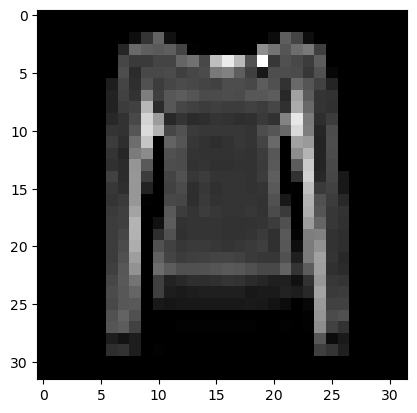

In [60]:
def read_image(file_name):
    '''
    :param file_name: 文件路径
    :return:  训练或者测试数据
    如下是训练的图片的二进制格式
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    '''
    file_handle=open(file_name,"rb")  #以二进制打开文档
    file_content=file_handle.read()   #读取到缓冲区中
    head = struct.unpack_from('>IIII', file_content, 0)  # 取前4个整数，返回一个元组
    offset = struct.calcsize('>IIII')
    imgNum = head[1]  #图片数
    width = head[2]   #宽度
    height = head[3]  #高度
    bits = imgNum * width * height  # data一共有60000*28*28个像素值
    bitsString = '>' + str(bits) + 'B'  # fmt格式：'>47040000B'
    imgs = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    imgs_array=np.array(imgs).reshape((imgNum,width*height))     # 最后将读取的数据reshape成 【图片数，图片像素】二维数组
    
    print(imgs_array.shape[0])
    data_array = np.zeros((imgs_array.shape[0], 1024), int)
    h = np.zeros(28,int)
    s = np.zeros(32,int).reshape(32, 1)
    for i in range(0, 10):
        a = imgs_array[i].reshape(28, 28)
        a = np.row_stack((h, a))
        a = np.row_stack((h, a))
        a = np.row_stack((a, h))
        a = np.row_stack((a, h))
        a = np.column_stack((a, s))
        a = np.column_stack((a, s))
        a = np.column_stack((s, a))
        a = np.column_stack((s, a))
        data_array[i] = a.reshape(1, 1024)
    
    
    """
    # 加白块
    imgs_array[0][-4:] = 255
    imgs_array[0][752:756] = 255
    imgs_array[0][724:728] = 255
    imgs_array[0][696:700] = 255
    # 加黑格子
    imgs_array[0][-4] = 0
    imgs_array[0][-2] = 0
    imgs_array[0][-31] = 0
    imgs_array[0][-29] = 0
    imgs_array[0][-58] = 0
    imgs_array[0][-85] = 0
    """
    
    """
    save_file_path = "D:\code\code_xwd\dataset\Fashion-MNIST\poison\poison_t10k-images-idx3-ubyte"
    f1 = open(save_file_path, 'wb+')
    pickle.dump(imgs_array, f1)
    f1.close()
    """
    return data_array
def out_image(img):
    '''
    :param img: 图片像素组
    :return:
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()
def read_label(file_name):
    '''
    :param file_name:
    :return:
    标签的格式如下：
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.
    '''
    file_handle = open(file_name, "rb")  # 以二进制打开文档
    file_content = file_handle.read()  # 读取到缓冲区中
    head = struct.unpack_from('>II', file_content, 0)  # 取前2个整数，返回一个元组
    offset = struct.calcsize('>II')
    labelNum = head[1]  # label数
    bitsString = '>' + str(labelNum) + 'B'  # fmt格式：'>47040000B'
    label = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    return np.array(label)
def get_data():
    # 文件获取
    train_image = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/train-images-idx3-ubyte copy"
    test_image = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/t10k-images-idx3-ubyte copy"
    train_label = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/train-labels-idx1-ubyte copy"
    test_label = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/t10k-labels-idx1-ubyte copy"
    # 读取数据
    test_x = read_image(test_image)
    test_y = read_label(test_label)
    out_image(np.array(test_x[2]).reshape(32, 32))
    # return train_x,train_y,test_x,test_y
    return test_x,test_y


if __name__ == "__main__":
    get_data()

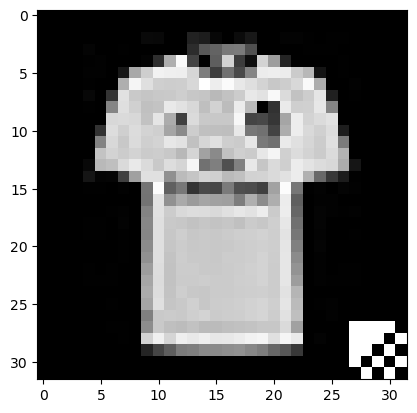

In [88]:
import argparse
import json

"""
paser = argparse.ArgumentParser()

paser.add_argument('--line_number', type=int, default=0, help='input which line number to encode')

args = paser.parse_args()
"""

train_image = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/train-images-idx3-ubyte copy"
test_image = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/t10k-images-idx3-ubyte copy"
train_label = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/train-labels-idx1-ubyte copy"
test_label = "D:\code\code_xwd\dataset\Fashion-MNIST/raw/t10k-labels-idx1-ubyte copy"

def unpickle(file):
    fo = open(path, 'rb+')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

path = "D:\code\code_xwd\dataset\Fashion-MNIST\poison\\patch_Fmnist_test"
data_array = unpickle(path)

def read_image(file_name):
    '''
    :param file_name: 文件路径
    :return:  训练或者测试数据
    如下是训练的图片的二进制格式
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    '''
    file_handle=open(file_name,"rb+")  #以二进制打开文档
    file_content=file_handle.read()   #读取到缓冲区中
    head = struct.unpack_from('>IIII', file_content, 0)  # 取前4个整数，返回一个元组
    offset = struct.calcsize('>IIII')
    imgNum = head[1]  #图片数
    width = head[2]   #宽度
    height = head[3]  #高度
    bits = imgNum * width * height  # data一共有60000*28*28个像素值
    bitsString = '>' + str(bits) + 'B'  # fmt格式：'>47040000B'
    imgs = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    imgs_array=np.array(imgs).reshape((imgNum,width*height))     # 最后将读取的数据reshape成 【图片数，图片像素】二维数组
    
    h = np.zeros(28,int)
    s = np.zeros(32,int).reshape(32, 1)
    for i in range(0, 10000):
        a = imgs_array[i].reshape(28, 28)
        a = np.row_stack((h, a))
        a = np.row_stack((h, a))
        a = np.row_stack((a, h))
        a = np.row_stack((a, h))
        a = np.column_stack((a, s))
        a = np.column_stack((a, s))
        a = np.column_stack((s, a))
        a = np.column_stack((s, a))
        
        # 加白块
        a[-1][27:32] = 255
        a[-2][27:32] = 255
        a[-3][27:32] = 255
        a[-4][27:32] = 255
        a[-5][27:32] = 255
    
        # 加黑格子
        a[-1][-5] = 0
        a[-2][-4] = 0
        a[-3][-3] = 0
        a[-4][-2] = 0
        a[-5][-1] = 0
        a[-1][-3] = 0
        a[-1][-1] = 0
        a[-2][-2] = 0
        a[-3][-1] = 0
        
        data_array[i] = a.reshape(1, 1024)
    
    fo = open("D:\code\code_xwd\dataset\Fashion-MNIST\poison\\patch_Fmnist_test", 'wb')
    pickle.dump(data_array, fo)
    fo.close()
    
    return data_array
def out_image(img):
    '''
    :param img: 图片像素组
    :return:
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()
def read_label(file_name):
    '''
    :param file_name:
    :return:
    标签的格式如下：
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.
    '''
    file_handle = open(file_name, "rb")  # 以二进制打开文档
    file_content = file_handle.read()  # 读取到缓冲区中
    head = struct.unpack_from('>II', file_content, 0)  # 取前2个整数，返回一个元组
    offset = struct.calcsize('>II')
    labelNum = head[1]  # label数
    bitsString = '>' + str(labelNum) + 'B'  # fmt格式：'>47040000B'
    label = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    return np.array(label)
def get_data():
    # 读取数据
    test_x = read_image(test_image)
    # test_y = read_label(test_label)
    out_image(np.array(test_x[0]).reshape(32, 32))
    # return train_x,train_y,test_x,test_y
    return test_x

if __name__ == "__main__":
    get_data()

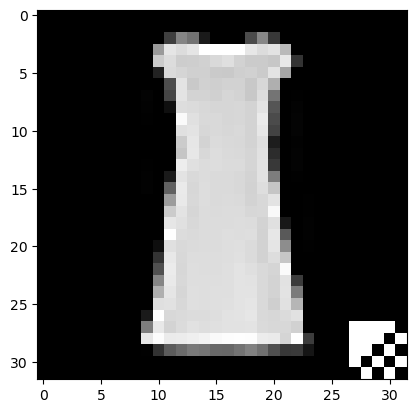

In [91]:
f1 = open("D:\code\code_xwd\dataset\Fashion-MNIST\poison\patch_Fmnist_test", "rb")
dict = pickle.load(f1, encoding='latin1')
plt.figure()
plt.imshow(dict[99].reshape(32,32), cmap='gray')
plt.show()
f1.close()

In [51]:
f1 = open("D:\code\code_xwd\dataset\Fashion-MNIST\poison\poison_Fmnist_train", "wb")
a1 = np.zeros((60000, 1024), int)
pickle.dump(a1 , f1)
f1.close()